In [1]:
import os
import wandb
import huggingface_hub
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd

load_dotenv()

# TODO - write your own token here
hf_token = os.getenv("HF_TOKEN")
wandb_token = os.getenv("wandb_api_key")
huggingface_hub.login(token=hf_token)

# login into the clients
wandb.login(key=wandb_token)
huggingface_hub.login(token=hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/erik/.cache/huggingface/token
Login successful


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: bode-karl-erik (erikbodedev). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/erik/.netrc


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/erik/.cache/huggingface/token
Login successful


In [2]:
api = wandb.Api()


In [3]:

run_grid = api.run("/erikbodedev/gemma2b_identifying_opinions_in_informative_text/runs/sn05dklz")
run_BO = api.run("/erikbodedev/gemma2b_identifying_opinions_in_informative_text/runs/xji71uut")
run_tokens = api.run("/erikbodedev/gemma2b_identifying_opinions_in_informative_text/runs/tshbda16")


In [4]:
history_grid = run_grid.history()
history_BO = run_BO.history()
history_tokens = run_tokens.history()

In [5]:
history_grid

,train/grad_norm,eval/loss,eval/rouge1,_runtime,_timestamp,eval/rougeL,train/learning_rate,train/loss,eval/rouge2,eval/samples_per_second,eval/rougeLsum,train/epoch,train/global_step,_step,eval/runtime,eval/steps_per_second
0,0.514837,NaN,NaN,9.068734,1.722006e+09,NaN,0.000010,4.5597,NaN,NaN,NaN,0.0004,1,0,NaN,NaN
1,0.937034,NaN,NaN,9.746434,1.722006e+09,NaN,0.000020,5.5768,NaN,NaN,NaN,0.0008,2,1,NaN,NaN
2,0.730014,NaN,NaN,14.965492,1.722006e+09,NaN,0.000020,5.0493,NaN,NaN,NaN,0.0040,10,9,NaN,NaN
3,0.847223,NaN,NaN,15.629514,1.722006e+09,NaN,0.000020,4.8884,NaN,NaN,NaN,0.0044,11,10,NaN,NaN
4,0.791608,NaN,NaN,16.271585,1.722006e+09,NaN,0.000020,5.1875,NaN,NaN,NaN,0.0048,12,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.814572,NaN,NaN,2017.816467,1.722008e+09,NaN,0.000012,3.4011,NaN,NaN,NaN,0.8744,2186,2195,NaN,NaN
496,4.156936,NaN,NaN,2019.102900,1.722008e+09,NaN,0.000012,3.2041,NaN,NaN,NaN,0.8752,2188,2197,NaN,NaN
497,3.947455,NaN,NaN,2024.294906,1.722008e+09,NaN,0.000012,3.5866,NaN,NaN,NaN,0.8784,2196,2205,NaN,NaN
498,4.254326,NaN,NaN,2025.582051,1.722008e+09,NaN,0.000012,3.3571,NaN,NaN,NaN,0.8792,2198,2207,NaN,NaN


In [6]:
# run.config

In [32]:
# # Extract the relevant metrics
# train_loss = pd.DataFrame({
#     'global_step': history["train/global_step"],
#     'loss': history["train/loss"]
# })

# eval_loss = pd.DataFrame({
#     'global_step': history["train/global_step"],
#     'loss': history["eval/loss"]
# })

In [10]:
# Extract the relevant metrics
train_loss_grid = pd.DataFrame({
    'global_step': history_grid["train/epoch"],
    'loss': history_grid["train/loss"]
})

eval_loss_grid = pd.DataFrame({
    'global_step': history_grid["train/epoch"],
    'rouge' : history_grid["eval/rougeLsum"],
    'loss': history_grid["eval/loss"]
})

train_loss_BO = pd.DataFrame({
    'global_step': history_BO["train/epoch"],
    'loss': history_BO["train/loss"]
})
eval_loss_BO = pd.DataFrame({
    'global_step': history_BO["train/epoch"],
    'rouge' : history_BO["eval/rougeLsum"],
    'loss': history_BO["eval/loss"]
})

train_loss_tokens = pd.DataFrame({
    'global_step': history_tokens["train/epoch"],
    'loss': history_tokens["train/loss"]
})
eval_loss_tokens = pd.DataFrame({
    'global_step': history_tokens["train/epoch"],
    'rouge' : history_tokens["eval/rougeLsum"],
    'loss': history_tokens["eval/loss"]
})

In [13]:
# get the best val loss and rouge score for each run
best_val_loss_grid = eval_loss_grid.loc[eval_loss_grid['loss'].idxmin()]
best_val_rouge_grid = eval_loss_grid.loc[eval_loss_grid['rouge'].idxmax()]

best_val_loss_BO = eval_loss_BO.loc[eval_loss_BO['loss'].idxmin()]
best_val_rouge_BO = eval_loss_BO.loc[eval_loss_BO['rouge'].idxmax()]

best_val_loss_tokens = eval_loss_tokens.loc[eval_loss_tokens['loss'].idxmin()]
best_val_rouge_tokens = eval_loss_tokens.loc[eval_loss_tokens['rouge'].idxmax()]


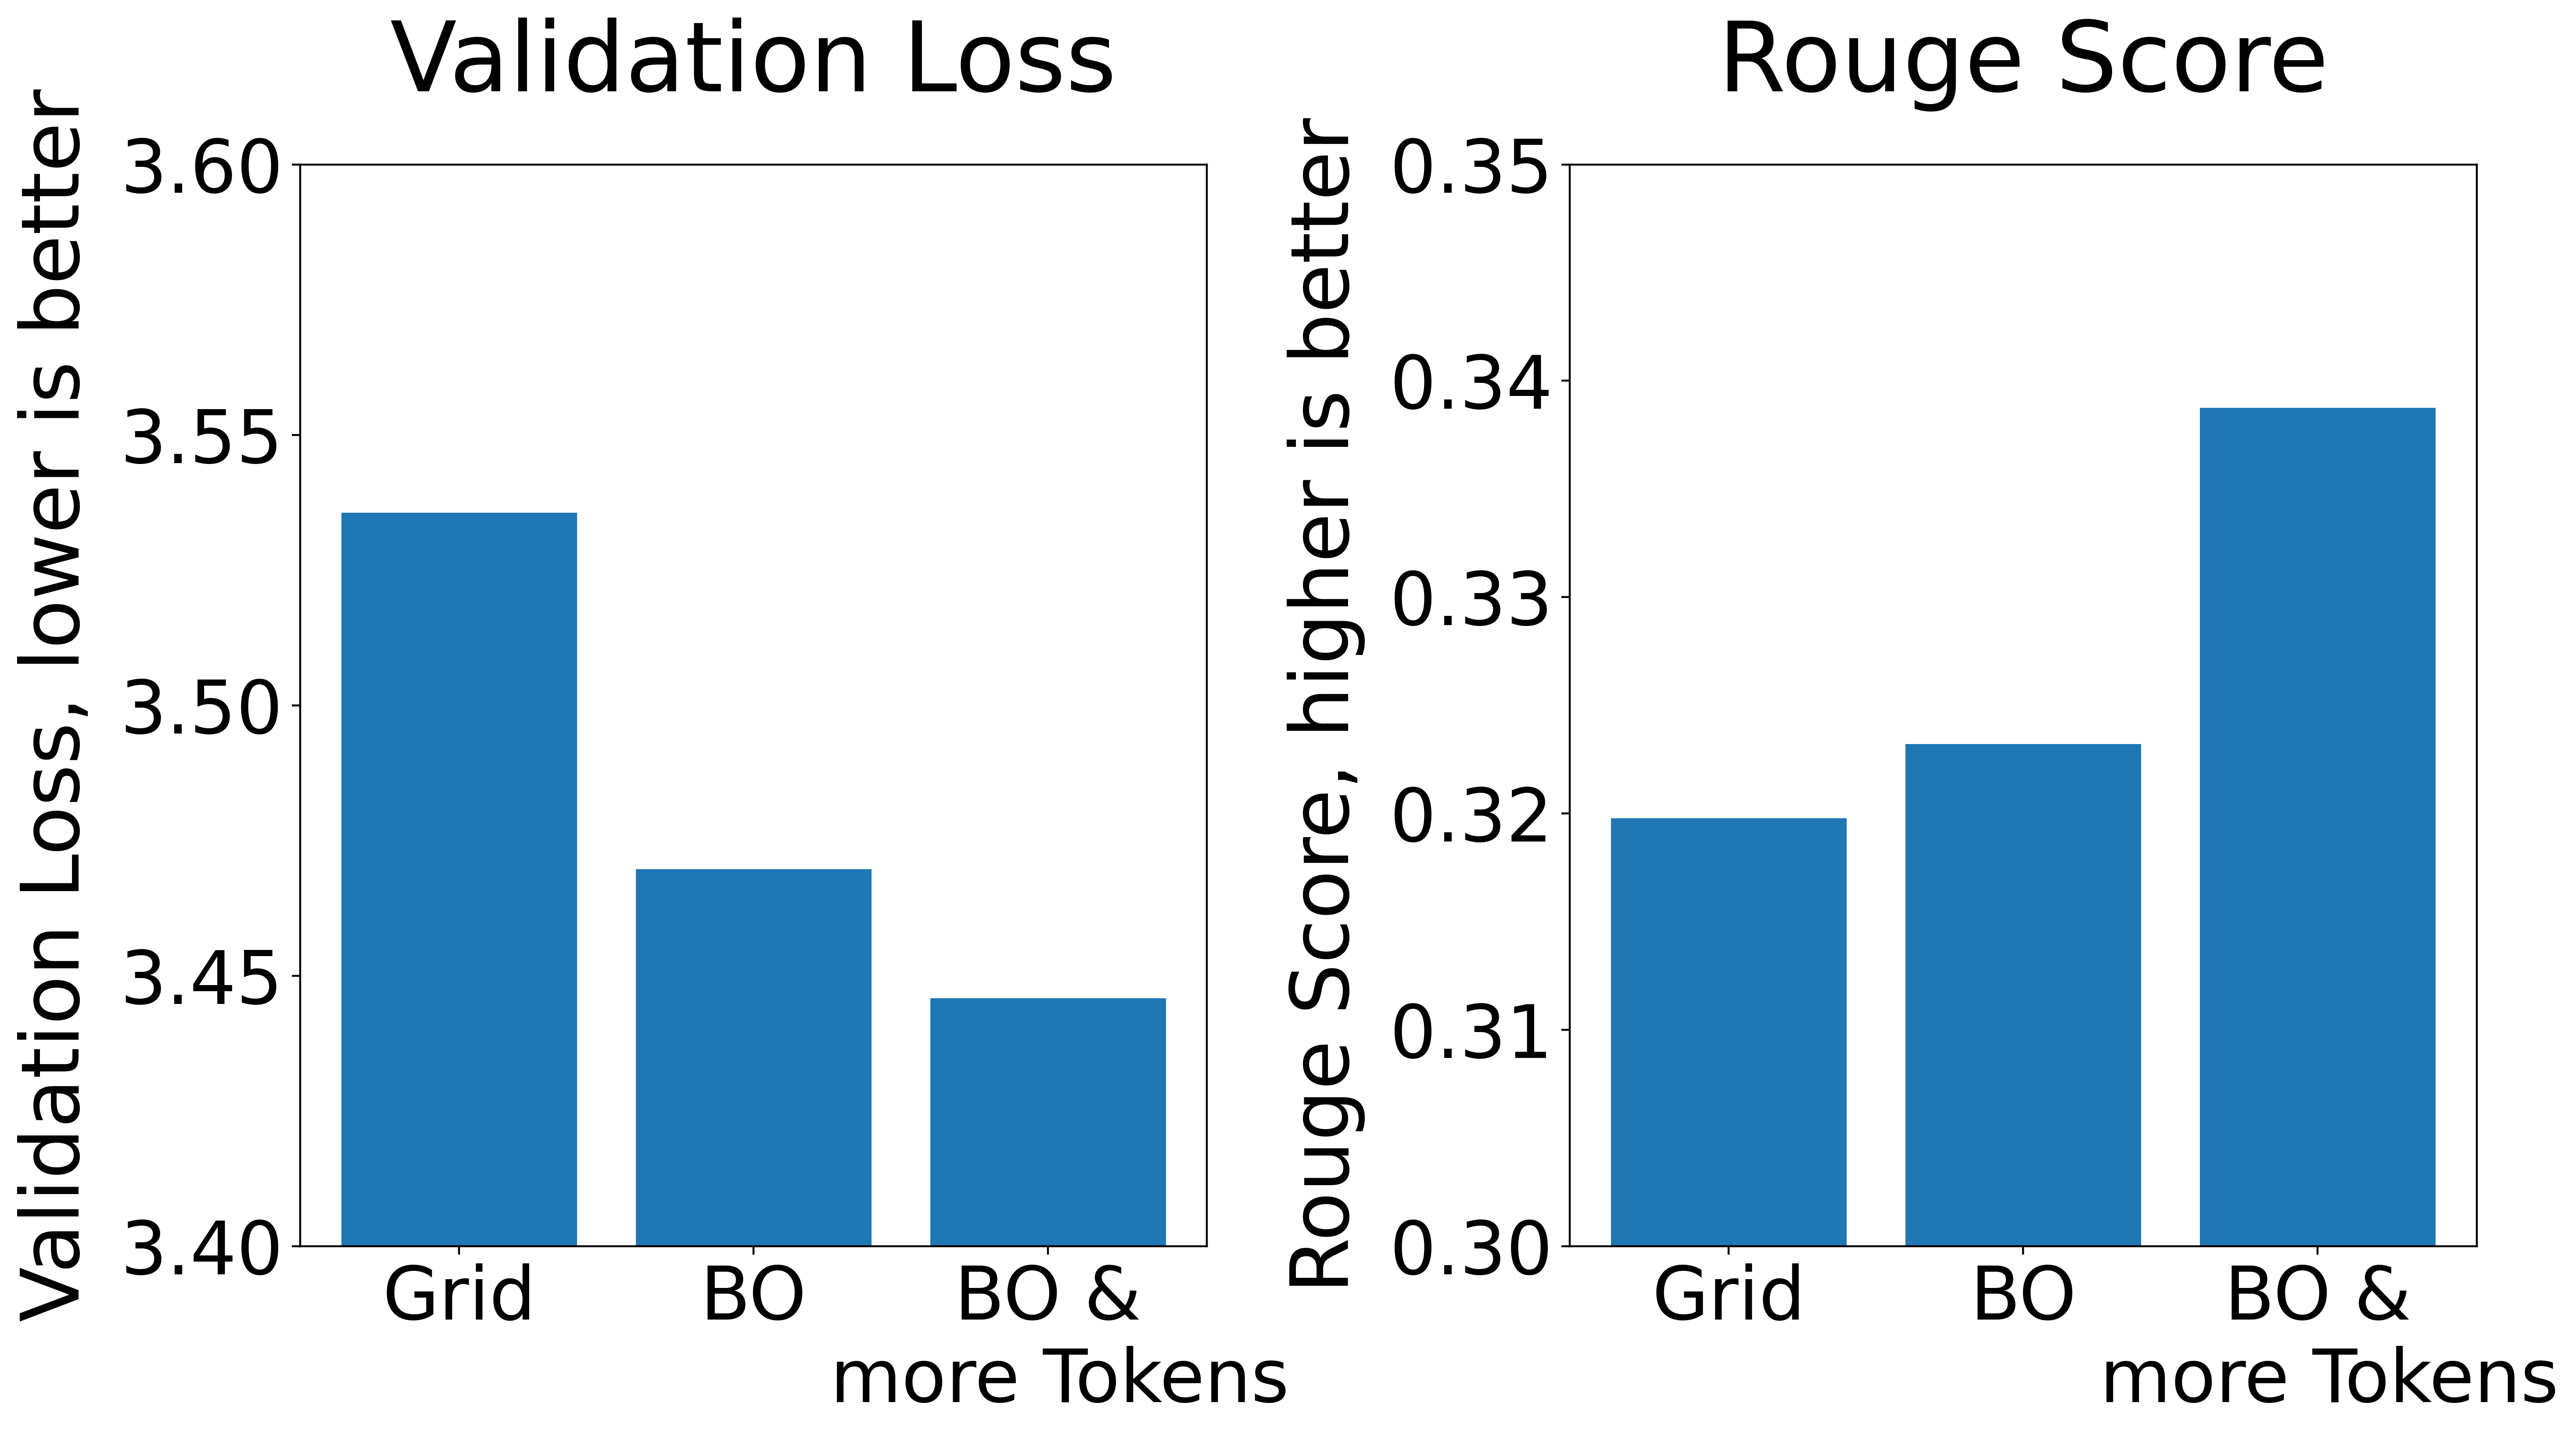

In [39]:
# bar plots for val loss and rouge score and note where higher is better and where lower is better
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=400)
ax[0].bar(['Grid', 'BO', 'BO &\n more Tokens'], [best_val_loss_grid['loss'], best_val_loss_BO['loss'], best_val_loss_tokens['loss']])
ax[0].set_title('Validation Loss', fontsize=40, pad=30)
ax[0].set_ylabel('Validation Loss, lower is better', fontsize=33, labelpad=10)
ax[0].set_ylim(3.4, 3.6)
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[1].bar(['Grid', 'BO', 'BO &\n more Tokens'], [best_val_rouge_grid['rouge'], best_val_rouge_BO['rouge'], best_val_rouge_tokens['rouge']])
ax[1].set_title('Rouge Score', fontsize=40, pad=30)
ax[1].set_ylabel('Rouge Score, higher is better',  fontsize=33, labelpad=10)
ax[1].set_ylim(0.3, 0.35)
ax[1].tick_params(axis='both', which='major', labelsize=30)
plt.subplots_adjust(wspace=0.4)

plt.show()